# **Churn Prediction Dataset for a bank. **

This dataset appears to be a Churn Prediction Dataset for a bank. The objective of the dataset is to predict whether a customer will leave the bank or not, based on various customer attributes.

Here’s a breakdown of each variable:

RowNumber:

Description: A unique index number for each row.

Type: Integer

Purpose: Mainly for identification; not useful for modeling.

CustomerId:

Description: A unique ID assigned to each customer.

Type: Integer

Purpose: Only used for identification; typically excluded from predictive modeling.

Surname:

Description: Customer's last name.

Type: Categorical (Text)

Purpose: Generally, surnames are not relevant for prediction as they don’t provide meaningful insights. However, they can sometimes be used for demographic analysis.

CreditScore:

Description: A numerical score representing the customer's creditworthiness.

Type: Numerical (Integer)

Purpose: Higher scores usually indicate lower risk; lower scores might imply higher chances of default or churn.

Geography:

Description: Country where the customer resides (France, Spain, or Germany).

Type: Categorical

Purpose: Regional differences in customer behavior can be captured using this variable.

Gender:

Description: Customer's gender (Male or Female).

Type: Categorical

Purpose: Gender may provide insights into customer behavior or preferences.

Age:

Description: Customer's age in years.

Type: Numerical (Integer)

Purpose: Older customers may exhibit different financial behavior compared to younger ones.

Tenure:

Description: Number of years the customer has been with the bank.

Type: Numerical (Integer)

Purpose: Longer tenure may indicate customer loyalty, though it may also lead to churn due to dissatisfaction over time.

Balance:

Description: The customer’s account balance.

Type: Numerical (Float)

Purpose: High or zero balances may correlate with customer retention or churn.

NumOfProducts:

Description: Number of bank products the customer has (e.g., credit cards, savings accounts, loans).

Type: Integer

Purpose: More products often indicate stronger customer engagement, but in some cases, it may lead to dissatisfaction.

HasCrCard:

Description: Whether the customer has a credit card (1 = Yes, 0 = No).

Type: Categorical (Binary)

Purpose: Credit card ownership may be linked to customer satisfaction or spending behavior.

IsActiveMember:

Description: Whether the customer is an active member (1 = Yes, 0 = No).

Type: Categorical (Binary)

Purpose: Active members are generally more engaged and less likely to churn.

EstimatedSalary:

Description: The customer’s estimated annual salary.

Type: Numerical (Float)

Purpose: Salaries might influence customer financial behavior and retention likelihood.

Exited:

Description: Whether the customer has exited (churned) from the bank (1 = Yes, 0 = No).

Type: Categorical (Binary)

Purpose: This is the target variable that you will predict using machine learning models.

Conclusion:
This dataset is well-structured and suited for classification problems (predicting churn).

Preprocessing steps like handling categorical variables using One-Hot Encoding and scaling numerical variables are recommended.

Models like Logistic Regression, Random Forest, or XGBoost are commonly used for churn prediction tasks.



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import  callbacks
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error as mae
import seaborn as sns
%matplotlib inline
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# for Interactive Shells
from IPython.display import display

#removing warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Projects/Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


The dataset contains 10,000 observations accross 13 input variables and an output variable. The variable name, variable type, the measurement unit and a brief description is provided.

# Exploratory Data Analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


# Getting Descriptive Statistical  information of our data set

In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Insight:

Credit scores are spread out with a decent variation, indicating a wide range of customer creditworthiness.

Most customers have a credit score above 600, as the 25th percentile is 584 and the median (50%) is 652.

Age:
The age distribution is fairly wide.

Customers aged around 39 are most common, but the presence of senior customers (up to 92 years) indicates the bank serves a diverse age range.

This variable may have a strong correlation with churn, especially for younger or older customers.


Tenure
Most customers have a tenure between 3 to 7 years.

Customers with 0 years tenure might be new customers who could have a higher churn probability.

Balance:
A significant number of customers have 0 balance, indicating potential inactive accounts.

Higher balance holders may have a stronger relationship with the bank, which might reduce their churn probability.

Number Of Products:
Most customers own 1 or 2 products.

Customers with 4 products may have a higher commitment to the bank, reducing churn chances.

Customers with 1 product could be more prone to churn.

Has cs card:
70.5% of customers have a credit card.

Credit card ownership can be analyzed for churn correlation. Customers without cards may be less engaged.

IsActiveMember:
Insight:

Around 51.5% of customers are active members.

Active members are generally less likely to churn, making this a crucial feature for analysis.

Estimated Salary:

Insight:

The salary distribution is broad, with values ranging from very low to very high.

Further analysis could check whether salary influences churn behavior.

# Overall Insights:
Zero Balance Customers:

A large number of customers with zero balance may indicate inactive accounts. These customers are more likely to churn.

Credit Score and Age:

Customers with low credit scores (below 500) or in older age groups might be at a higher risk of churn.

Products and Churn:

Customers with only one product are more likely to churn. Offering cross-sell opportunities could improve retention.

Active vs Inactive:

Focus on converting inactive customers to active members by offering targeted campaigns.

Salary Impact:

High-income customers might have different financial behaviors. Analyze further if churn is influenced by salary.

# Checking null values()

In [5]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


# There are no null values in our data set we can proceed ahead

# Lets check  for any irrelavant Duplicate entry

In [6]:
df.duplicated().sum()

np.int64(0)

# Lets check for any unique values in our data ()

In [7]:
for i in df.columns:
  print(i,df[i].unique())

RowNumber [    1     2     3 ...  9998  9999 10000]
CustomerId [15634602 15647311 15619304 ... 15584532 15682355 15628319]
Surname ['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
CreditScore [619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 7

# Now Lets Check Any Special Character in our data

In [8]:
import re

# Function to check for special characters and identify their locations
def check_special_chars(df):
    special_chars_info = []

    for col in df.columns:
        if df[col].dtype == 'object':  # Only check string columns
            for index, value in df[col].dropna().items():
                matches = re.findall(r'[^\w\s]', str(value))  # Find special characters
                if matches:
                    special_chars_info.append((index, col, value, matches))

    return special_chars_info

# Get details of special characters in the dataset
special_characters_found = check_special_chars(df)

if special_characters_found:
    print("Special characters found in the dataset:")
    for row in special_characters_found:
        print(f"Row: {row[0]}, Column: {row[1]}, Value: {row[2]}, Special Characters: {row[3]}")
else:
    print("No special characters found.")


Special characters found in the dataset:
Row: 9, Column: Surname, Value: H?, Special Characters: ['?']
Row: 52, Column: Surname, Value: O'Brien, Special Characters: ["'"]
Row: 58, Column: Surname, Value: T'ien, Special Characters: ["'"]
Row: 109, Column: Surname, Value: T'ang, Special Characters: ["'"]
Row: 183, Column: Surname, Value: T'ang, Special Characters: ["'"]
Row: 186, Column: Surname, Value: T'ao, Special Characters: ["'"]
Row: 226, Column: Surname, Value: Ch'ien, Special Characters: ["'"]
Row: 228, Column: Surname, Value: O'Sullivan, Special Characters: ["'"]
Row: 265, Column: Surname, Value: Ch'iu, Special Characters: ["'"]
Row: 279, Column: Surname, Value: K'ung, Special Characters: ["'"]
Row: 283, Column: Surname, Value: Ch'ien, Special Characters: ["'"]
Row: 288, Column: Surname, Value: O'Donnell, Special Characters: ["'"]
Row: 321, Column: Surname, Value: Ts'ai, Special Characters: ["'"]
Row: 329, Column: Surname, Value: L?, Special Characters: ['?']
Row: 408, Column: S

# Observations:
As we can see there are Special Charachters in our surname column

# Lets call out our numerical and categorical columns

In [9]:
n_cols=[]
for i in df.columns:
  if df.dtypes[i]==('int64','float64'):
    n_cols.append(i)
n_cols

['RowNumber',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

In [10]:
c_cols=[]
for i in df.columns:
  if df.dtypes[i]=='object':
    c_cols.append(i)
c_cols

['Surname', 'Geography', 'Gender']

# All predictors in the dataset are quantitative datatypes. Moreover, there are no missing values in the data. Lets analyse the probability distribution of the variables through a series of univariate density plots.

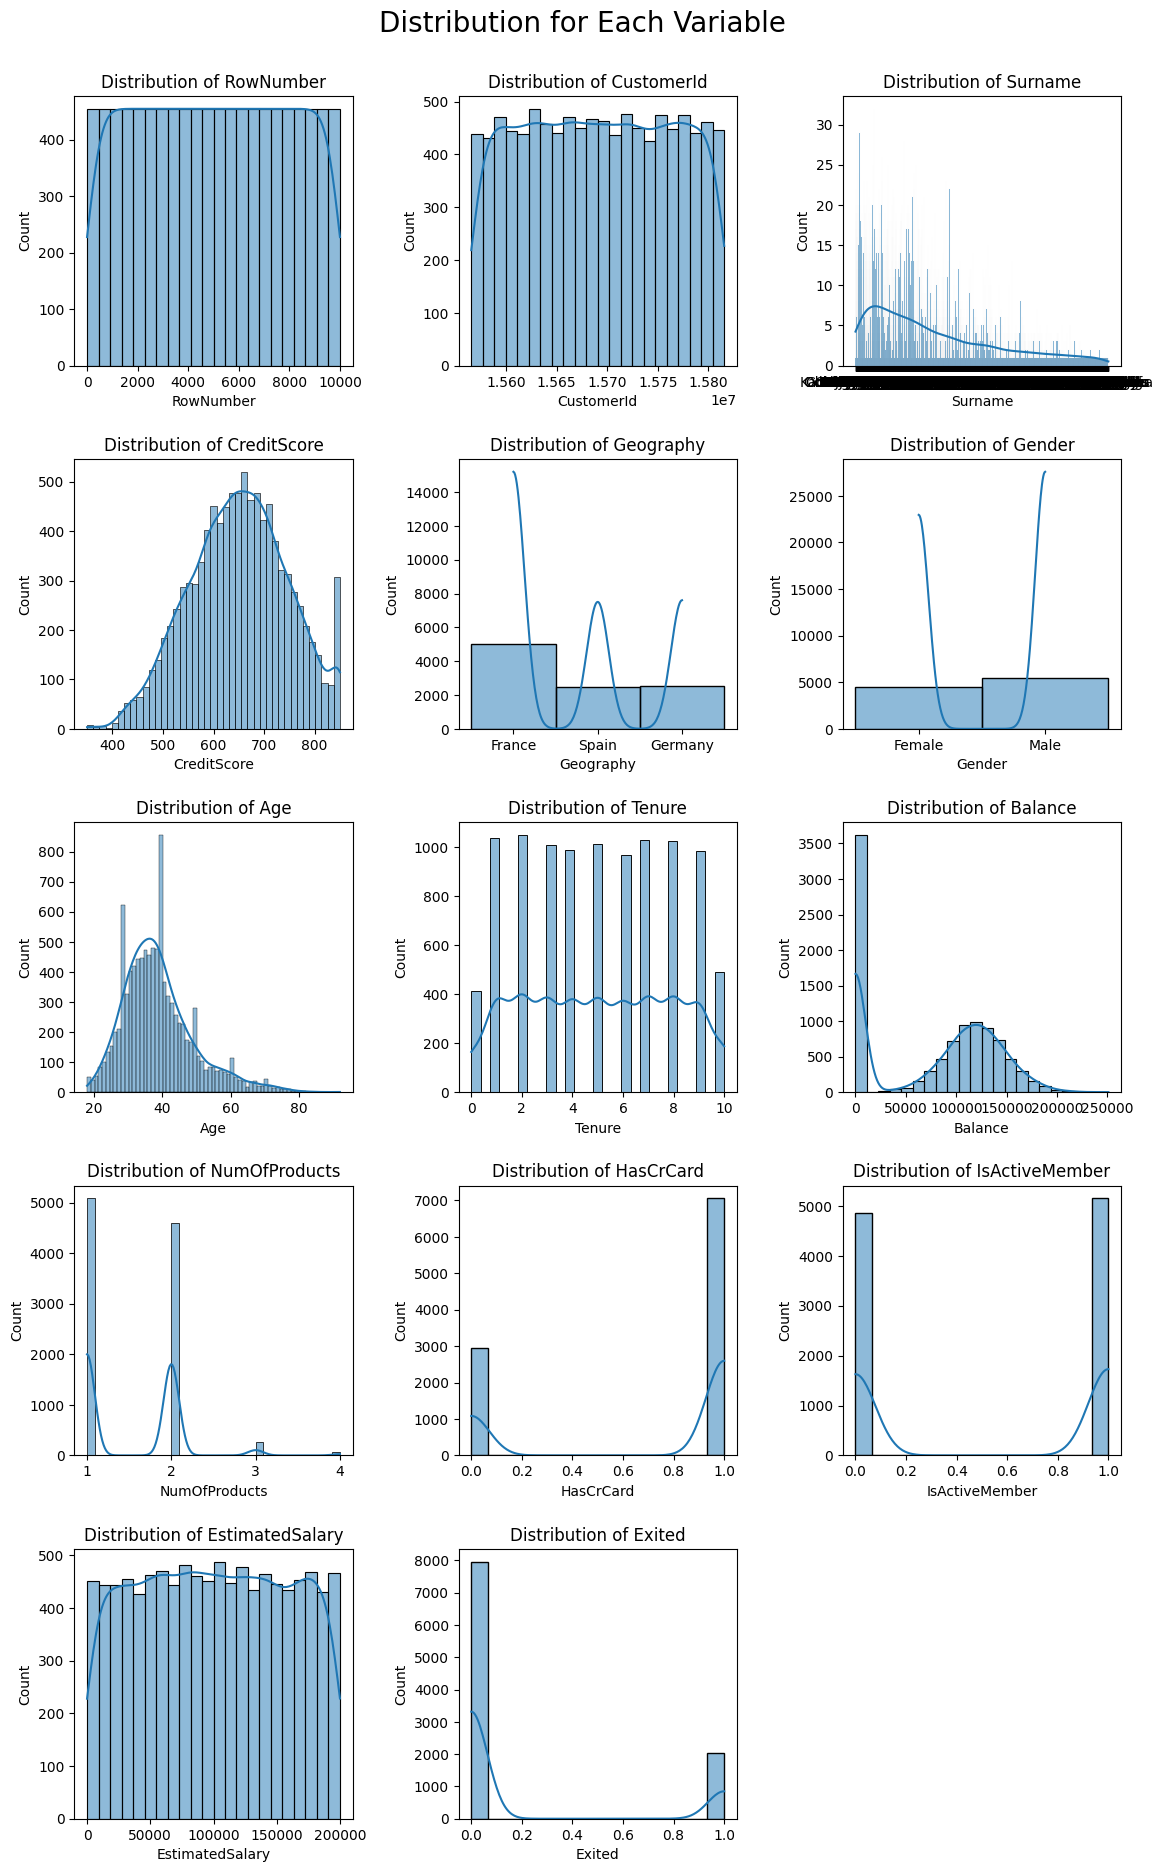

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

def dist_custom(dataset, columns_list, suptitle=''):
    num_subplots = len(columns_list)
    cols = 3  # Fixed number of columns
    rows = int(np.ceil(num_subplots / cols))  # Calculate required rows dynamically

    # Adjust figure size for better clarity
    fig, axs = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    fig.suptitle(suptitle, y=0.94, x=0.5, fontsize=20)

    # Flatten the axs array for easy iteration
    axs = axs.flatten()

    # Plot distributions
    for i in range(num_subplots):
        sns.histplot(dataset[columns_list[i]], kde=True, ax=axs[i])
        axs[i].set_title(f'Distribution of {columns_list[i]}')

    # Hide unused subplots
    for j in range(num_subplots, len(axs)):
        fig.delaxes(axs[j])

    # Adjust layout to reduce clutter
    plt.tight_layout(rect=[0, 0, 1, 0.95], pad=2.0)
    plt.show()


dist_custom(dataset=df, columns_list=df.columns, suptitle='Distribution for Each Variable')

# Violin plots for our numerical columns to detect any anomalies

In [12]:
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots

num_cols = ['RowNumber', 'CustomerId', 'CreditScore', 'Age',
            'Tenure', 'NumOfProducts', 'HasCrCard',
            'IsActiveMember', 'Exited']

# Set rows and columns
cols = 3
rows = int(np.ceil(len(num_cols) / cols))

# Create subplots with titles
fig = make_subplots(rows=rows, cols=cols,
                     subplot_titles=num_cols)

row, col = 1, 1

# Add Violin Plots
for i, col_name in enumerate(num_cols):
    fig.add_trace(go.Violin(y=df[col_name],
                             name=col_name,
                             box_visible=True,
                             meanline_visible=True),
                   row=row, col=col)
    col += 1
    if col > 3:
        col = 1
        row += 1

# Update layout
fig.update_layout(height=1500, width=1500,
                  title_text="Distribution of Numerical Features (Violin Plots)")

fig.show()


# Distribution of Gender and Geography(Pie and Countplot)

<ipython-input-13-6e3eda8e5aee>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-13-6e3eda8e5aee>:19: UserWarning:


The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.

<ipython-input-13-6e3eda8e5aee>:27: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



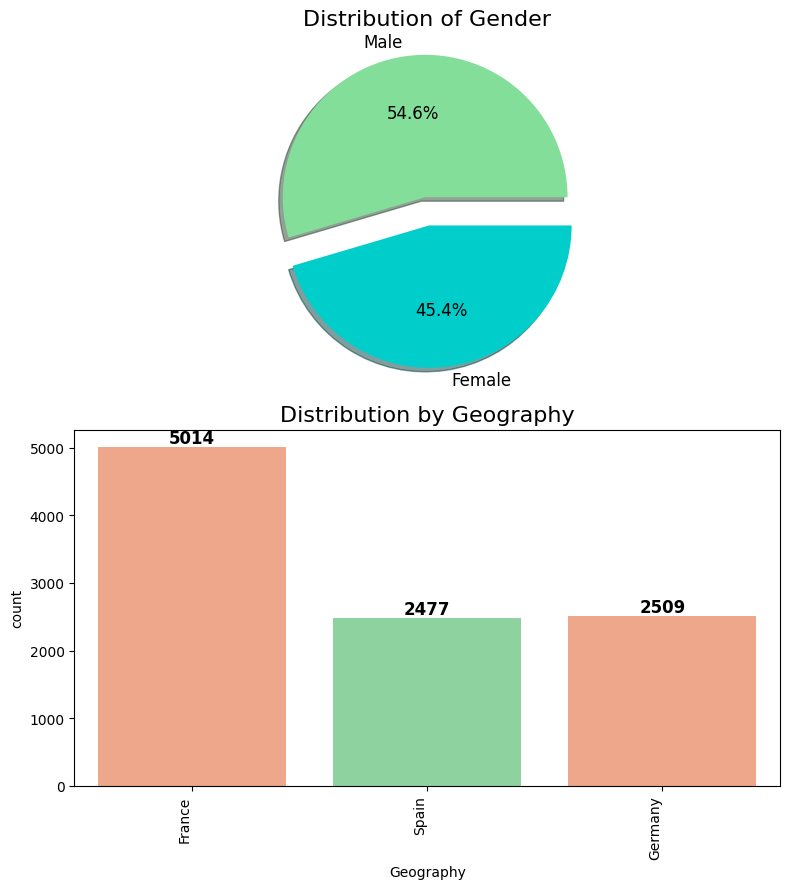

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a 2x1 subplot layout
fig, axes = plt.subplots(2, 1, figsize=(8, 9))

# Pie Chart for Gender Distribution
explode_source = [0.1] * len(df['Gender'].value_counts())
axes[0].pie(df['Gender'].value_counts(),
            explode=explode_source,
            autopct='%1.1f%%',
            shadow=True,
            labels=df['Gender'].value_counts().index,
            colors=["#82DE99", "#01CECB"],
            textprops={'fontsize': 12})
axes[0].set_title('Distribution of Gender', fontsize=16)

# Count Plot for Geography Distribution
g = sns.countplot(x='Geography', data=df, palette=['#FFA07A', '#82DE99'], ax=axes[1])
axes[1].set_title('Distribution by Geography', fontsize=16)

# Add data labels
for container in g.containers:
    g.bar_label(container, fmt="%d", fontsize=12, fontweight='bold', label_type='edge')

# Rotate x-axis labels
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


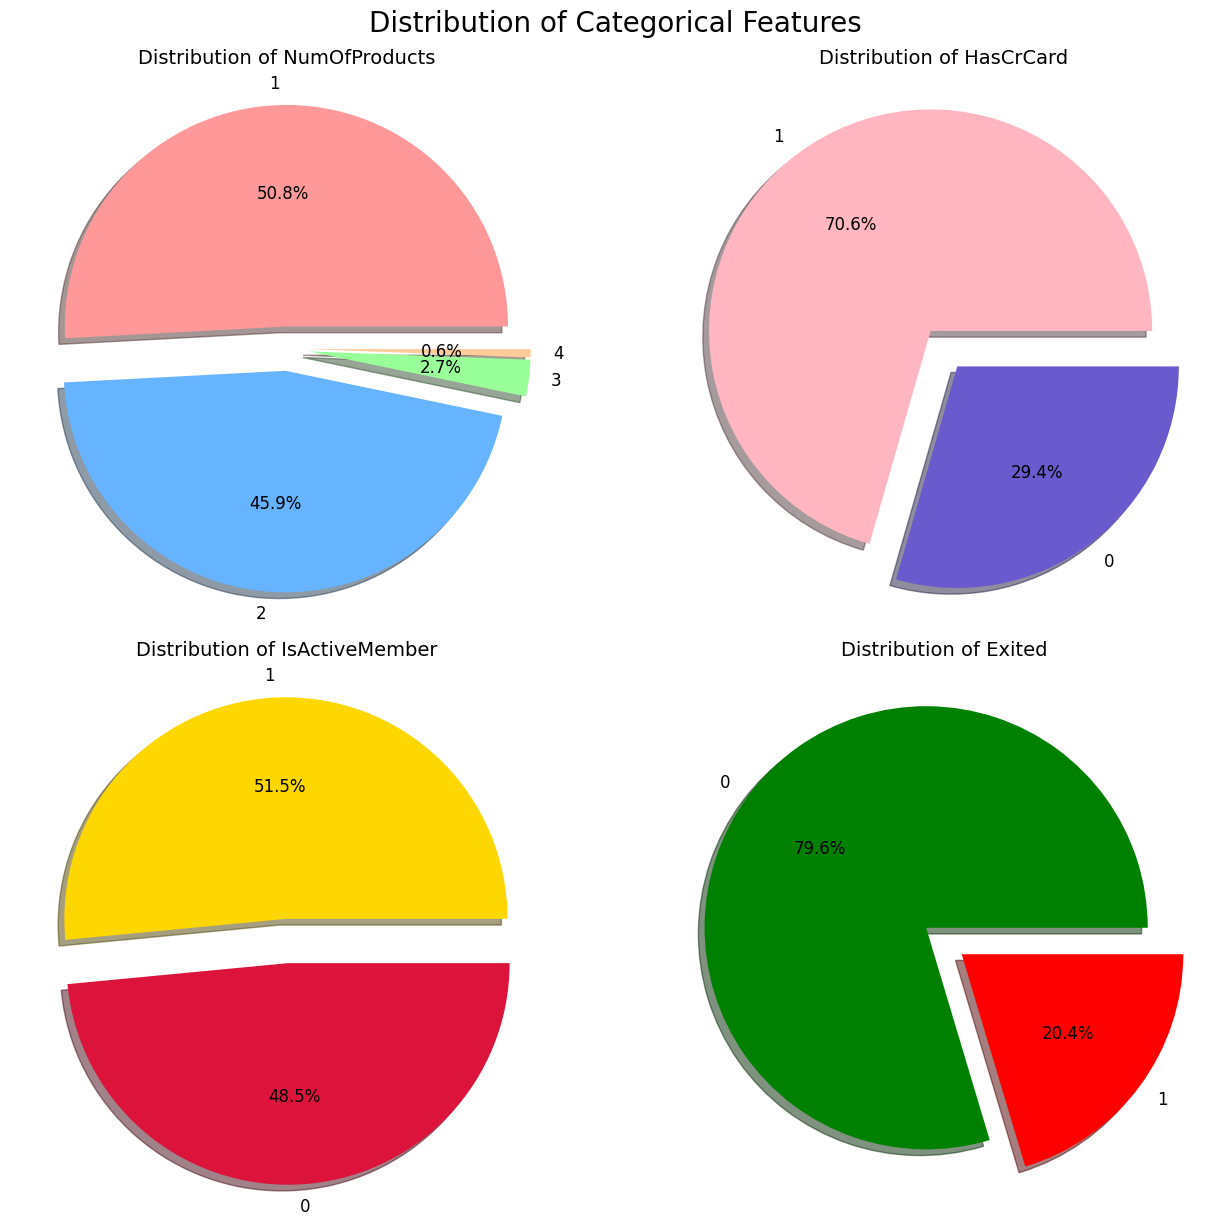

In [14]:
import matplotlib.pyplot as plt

# Create a 2x2 plot layout
fig, axes = plt.subplots(2, 2, figsize=(14, 12))

# Columns for pie charts and unique colors
columns_list = ['NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited'] # Changed 'NumofProducts' to 'NumOfProducts'
colors_list = [
    ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99'], # For NumOfProducts
    ['#FFB6C1', '#6A5ACD'],                       # For HasCrCard
    ['#FFD700', '#DC143C'],                        # For IsActiveMember
    ['#008000', '#FF0000']                         # For Exited
]

# Generate Pie Charts
for i, col_name in enumerate(columns_list):
    row, col = divmod(i, 2)  # Calculate row and column
    data = df[col_name].value_counts()
    explode_source = [0.1] * len(data)

    axes[row, col].pie(data,
                        explode=explode_source,
                        autopct='%1.1f%%',
                        shadow=True,
                        colors=colors_list[i][:len(data)],
                        labels=data.index,
                        textprops={'fontsize': 12})

    axes[row, col].set_title(f'Distribution of {col_name}', fontsize=14)

# Adjust layout
plt.tight_layout()
plt.suptitle("Distribution of Categorical Features", fontsize=20, y=1.02)
plt.show()

<ipython-input-15-6126d76e84af>:1: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




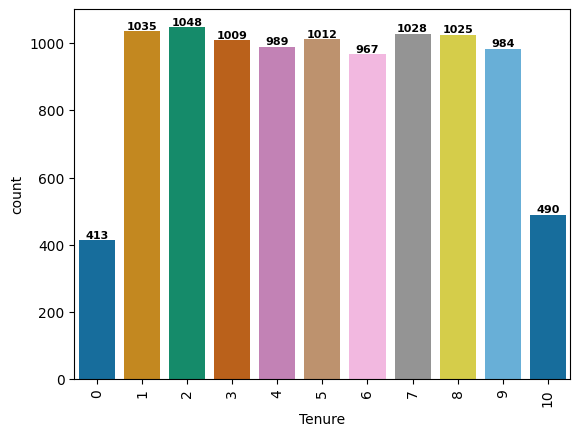

In [15]:
t=sns.countplot(x=df['Tenure'],palette='colorblind')
plt.xticks(rotation=90)
for container in t.containers:
    t.bar_label(container, fmt="%d", fontsize=8, fontweight='bold', label_type='edge')
plt.show()

# Sunburst

In [16]:
!pip install plotly
import plotly.express as px

In [17]:
fig = px.sunburst(df,
                  path=['Gender', 'IsActiveMember'],
                  values='Exited',  # Use 'Exited' as the values for the sunburst
                  title='Distribution of Gender, Active Member ~ Exited',
                  labels={'Gender': 'Sex', 'IsActiveMember': 'Active Member'},
                  height=600, width=800)
fig.update_layout(
    xaxis_title='Gender',
    yaxis_title='Is Active Member ',
    plot_bgcolor='rgb(243, 243, 243)',
    font=dict(family="Arial, sans-serif", size=12)
)
fig.show()

# PairPlot

KeyboardInterrupt: 

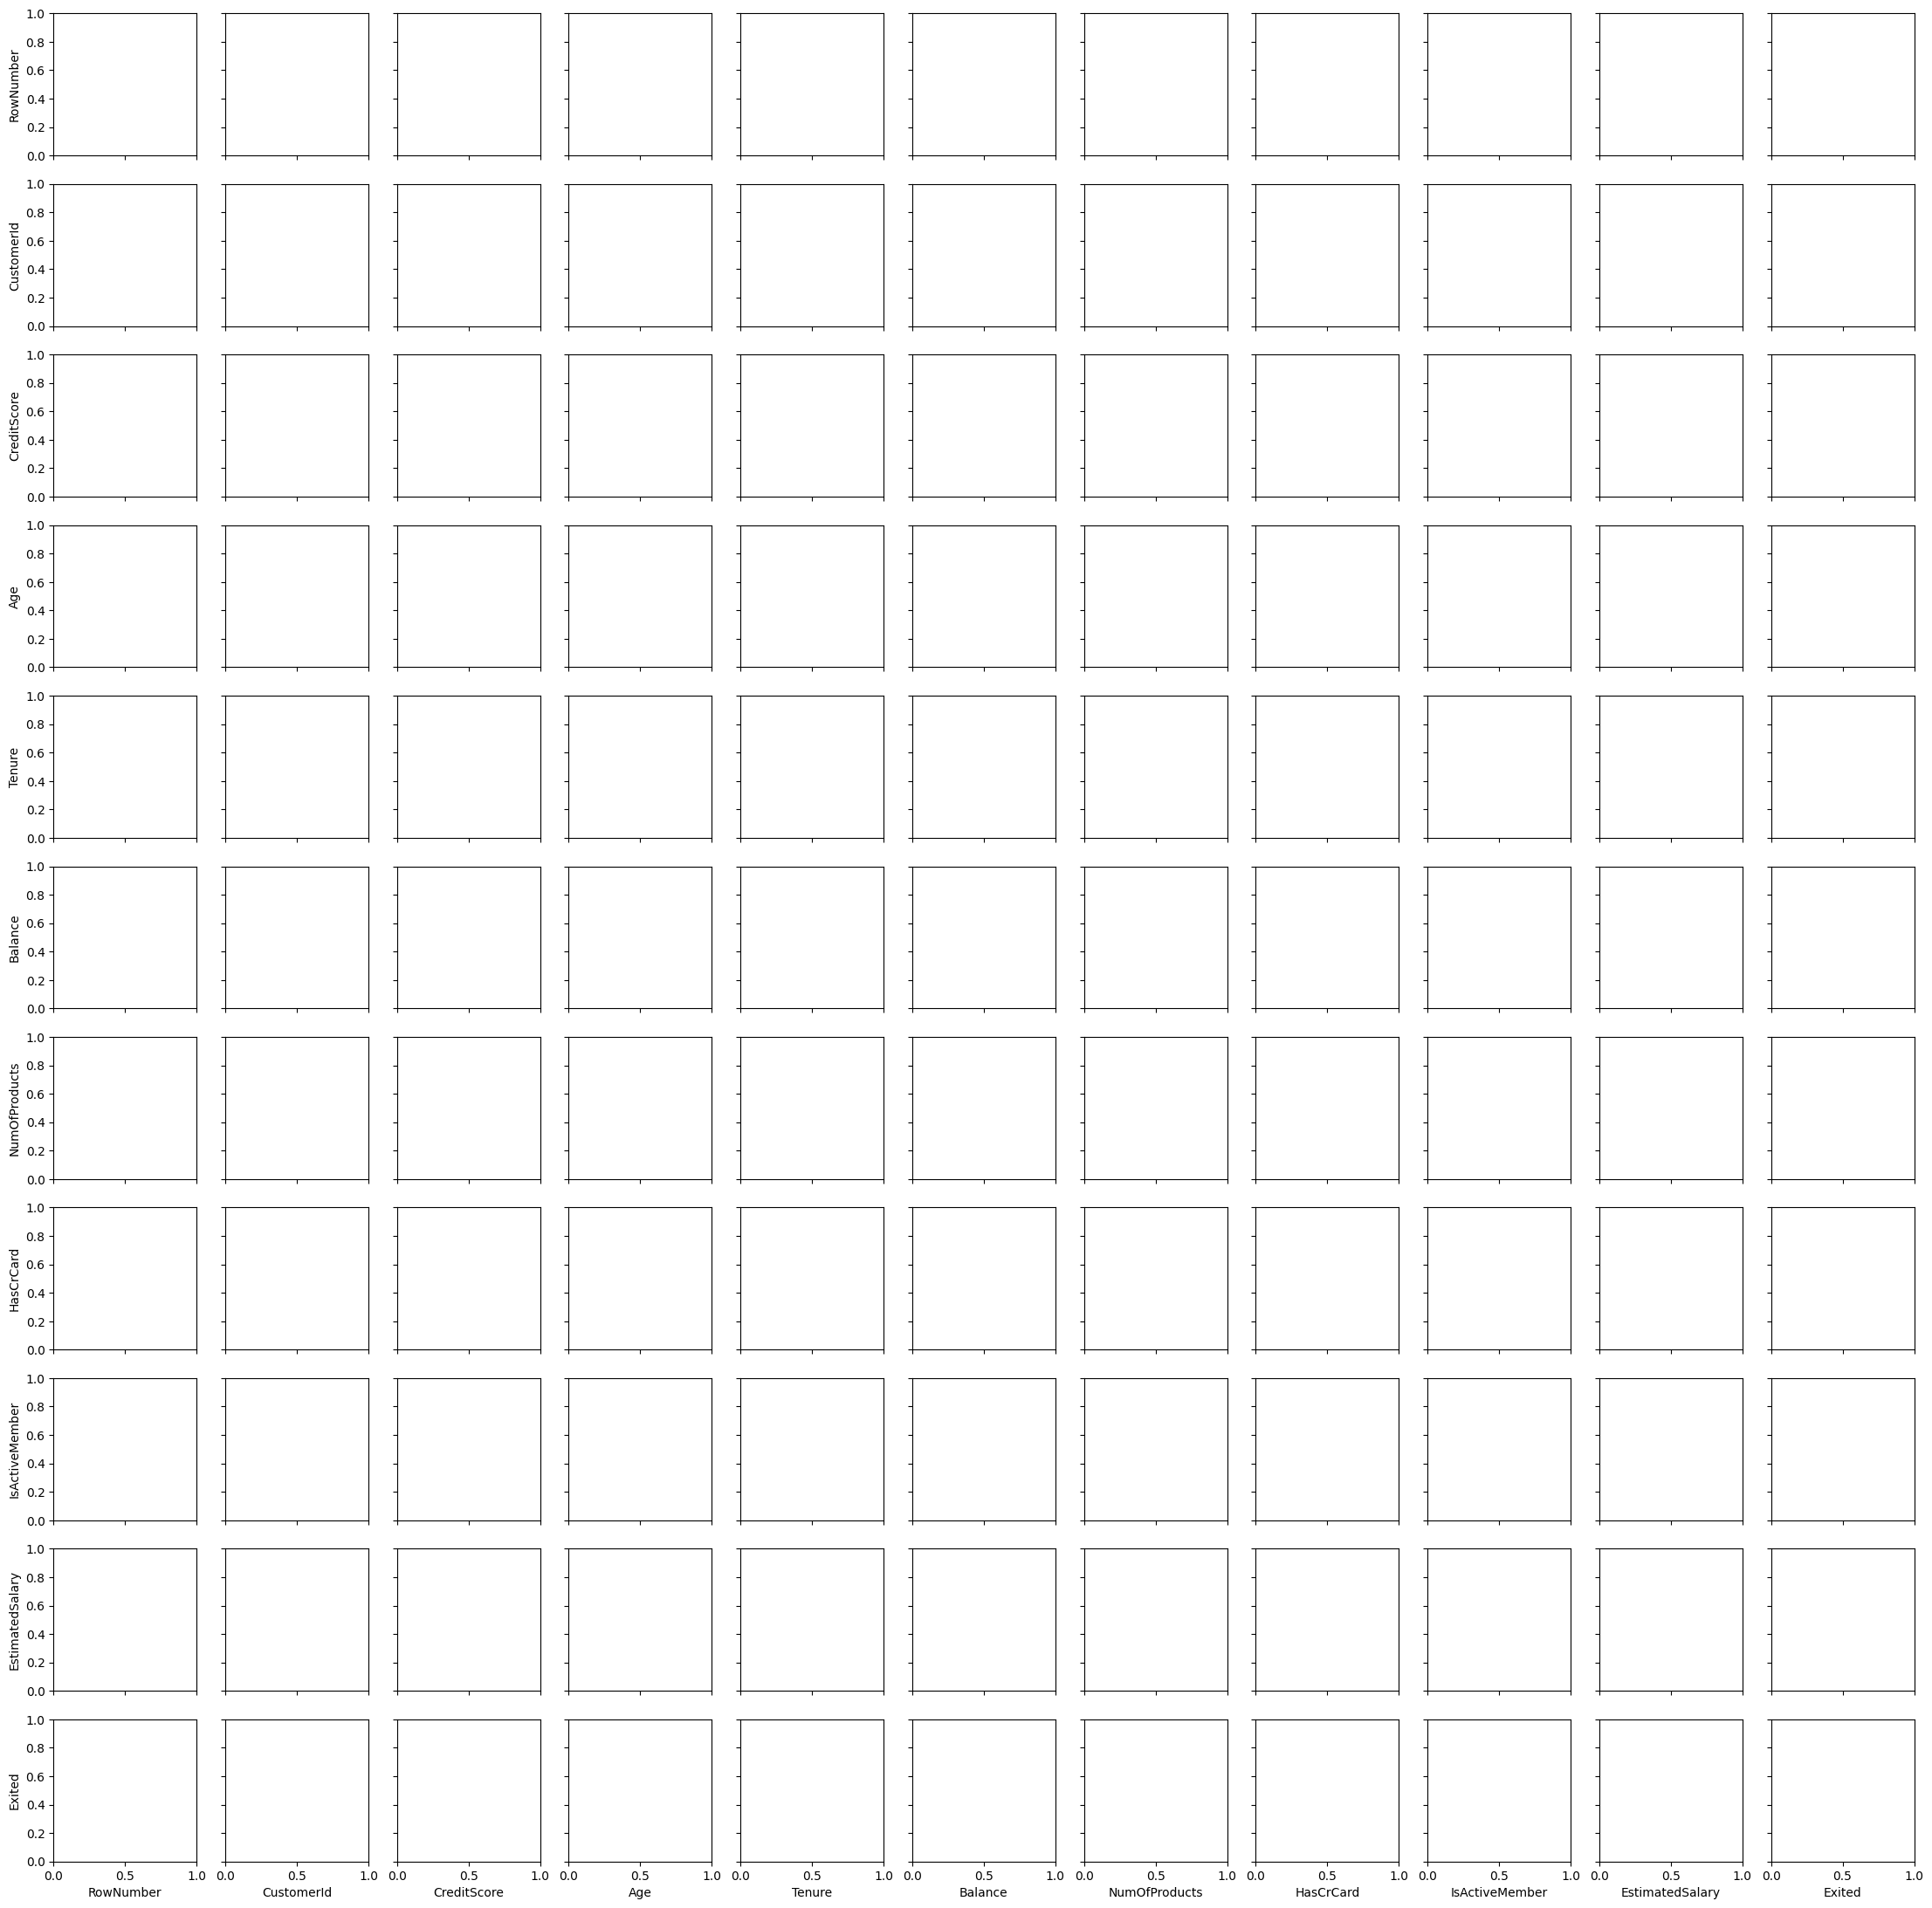

In [18]:
sns.pairplot(data=df,kind='reg')
plt.show()

# Data Pre-Processing

Some machine learning algorithms require features to be scaled through normalization or standardization. I will now split the dataset into training and testing and then perform standardization. This will tansform the features such that their mean and standard deviation will become 0 and 1.

In [21]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace = True)

In [22]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [23]:
X = df.drop(columns = ['Exited'])
y = df['Exited']

from  sklearn.model_selection import train_test_split
X_train,y_train,X_test,y_test=  train_test_split(X,y,test_size = 0.2,random_state =  1)

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Ensure X_train and X_test are 2D
if isinstance(X_train, pd.Series):
    X_train = X_train.to_frame()
if isinstance(X_test, pd.Series):
    X_test = X_test.to_frame()

# Scale the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [27]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [28]:
X_test_scaled

array([[-0.57749609, -0.6557859 , -0.69539349, ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.29729735,  0.3900109 , -1.38944225, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.52560743,  0.48508334, -0.3483691 , ..., -0.57946723,
         1.73494238, -1.09499335],
       ...,
       [ 0.81311987,  0.77030065,  0.69270405, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.41876609, -0.94100321, -0.3483691 , ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.24540869,  0.00972116, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

# Lets Build our first ANN Model

In [31]:
model =  Sequential()
model.add(Dense(11,activation = 'relu' ,input_dim = 11))
model.add(Dense(1,activation = 'sigmoid' ))

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 144 (576.00 B)

 Trainable params: 144 (576.00 B)

 Non-trainable params: 0 (0.00 B)

# Compileing the Ann Model

In [33]:
model.compile(loss ='binary_crossentropy',optimizer = 'Adam',metrics =['accuracy'])

# Lets Fit the Ann to the training set

In [34]:
history = model.fit(X_train_scaled,y_train,epochs = 100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.6827 - loss: 0.6143 - val_accuracy: 0.7962 - val_loss: 0.4838
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7945 - loss: 0.4848 - val_accuracy: 0.8056 - val_loss: 0.4415
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8102 - loss: 0.4396 - val_accuracy: 0.8194 - val_loss: 0.4244
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8083 - loss: 0.4445 - val_accuracy: 0.8269 - val_loss: 0.4166
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8148 - loss: 0.4286 - val_accuracy: 0.8281 - val_loss: 0.4123
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8184 - loss: 0.4202 - val_accuracy: 0.8319 - val_loss: 0.4092
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8189 - loss: 0.4205 - val_accuracy: 0.8369 - val_loss: 0.4062
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8298 - loss: 0.4126 - val_accu

In [35]:
y_log= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
y_pred = np.where(y_log >0.5,1,0)

In [37]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8615

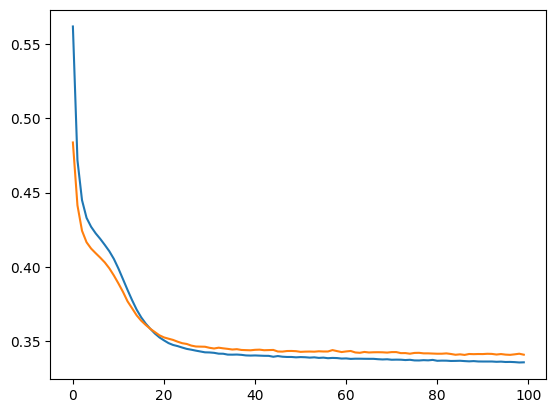

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

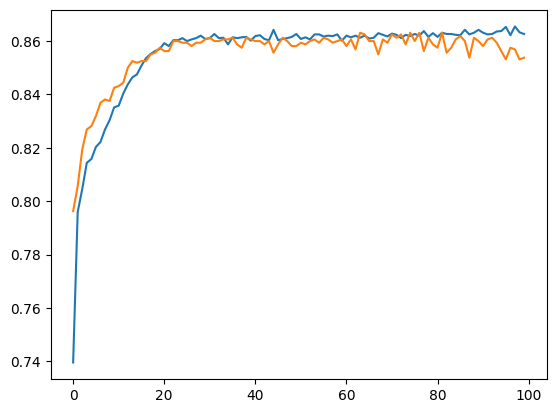

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.12279451699071009

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



318/318 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5464 - loss: 3081.8354 - val_accuracy: 0.0924 - val_loss: 1089.0187
Epoch 2/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5385 - loss: 1491.8839 - val_accuracy: 0.6402 - val_loss: 72.1516
Epoch 3/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5493 - loss: 917.9247 - val_accuracy: 0.5777 - val_loss: 76.9291
Epoch 4/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5464 - loss: 660.0251 - val_accuracy: 0.8769 - val_loss: 10.0404
Epoch 5/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5397 - loss: 490.8948 - val_accuracy: 0.4585 - val_loss: 44.2249
Epoch 6/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5466 - loss: 351.8371 - val_accuracy: 0.9461 - val_loss: 3.3972
Epoch 7/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5417 - loss: 264.1836 - val_accuracy: 0.6925 - val_loss: 17.1244
Epoch 8/100
318/318 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5395 - loss: 214.6

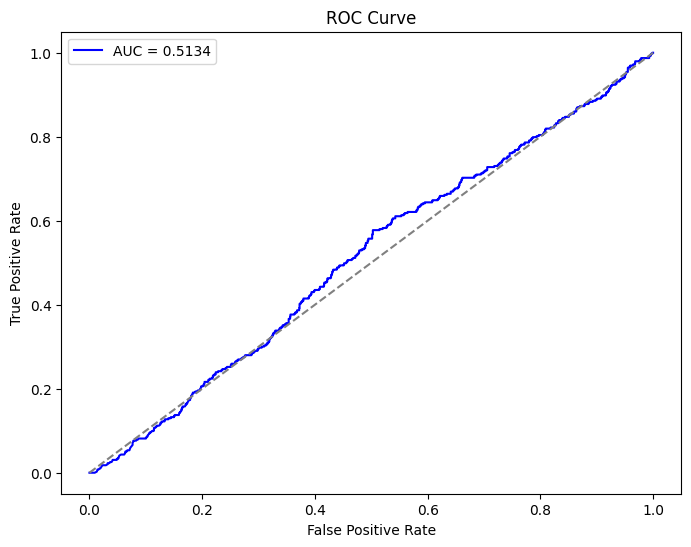

In [48]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Model Architecture
def build_optimized_model(input_dim):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

input_dim = X_resampled.shape[1]
model = build_optimized_model(input_dim)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_resampled, y_resampled, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict on test data
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict(X_test))
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()



**Overall Goal:**

The code aims to predict customer churn (whether a customer will leave a bank) based on various customer attributes like credit score, age, balance, products, etc. It uses a dataset (`Churn_Modelling.csv`) and applies data exploration, pre-processing, and model building techniques to achieve this goal.

**Key Components and Steps:**

1. **Data Loading and Exploration:**
   - The code starts by importing necessary libraries (pandas, numpy, tensorflow, etc.).
   - It loads the dataset and performs basic exploration using `.info()`, `.describe()`.
   - It investigates the distribution of features and checks for missing values and duplicates.
   - It visualizes the data using histograms, violin plots, pie charts, count plots, and a sunburst plot. These visualizations help understand the data characteristics and potential relationships between variables and churn.

2. **Data Preprocessing:**
   - It removes irrelevant columns like customer ID and surname.
   - It applies one-hot encoding to categorical features like geography and gender to convert them into numerical form.
   - It splits the data into training and testing sets.
   - It scales the numerical features using `StandardScaler` to ensure that all features have similar ranges and prevent certain features from dominating the model.

3. **Model Building:**
   - It defines a simple neural network (ANN) using `tensorflow.keras`.
   - It compiles the model with binary cross-entropy loss (for binary classification) and the Adam optimizer.
   - It trains the model on the training data for a certain number of epochs.
   - It evaluates the model's performance on the test data by calculating accuracy.

4. **Model Optimization:**
   - It implements SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance in the dataset. SMOTE creates synthetic examples of the minority class (customers who churned) to balance it with the majority class (customers who didn't churn).
   - It builds a more complex model with multiple layers and dropout to prevent overfitting.
   - It uses early stopping to stop training when the validation loss stops improving to prevent the model from learning the training data too well and generalizing poorly to new data.

5. **Model Evaluation:**
   - It calculates accuracy on the test set.
   - It generates a classification report, confusion matrix, and ROC curve to evaluate the model's performance in more detail.

**Potential Improvements:**

- Feature engineering:  Generating new features from existing ones could potentially improve the model's predictive power.
- Hyperparameter tuning: Optimizing the learning rate, number of layers, number of neurons, and other model parameters can improve model performance.
- Model Selection: Experimenting with different models like support vector machines, random forests, or gradient boosting machines can lead to better results depending on the data.
- Handling class imbalance: Instead of SMOTE, other techniques like cost-sensitive learning can be used to address class imbalance effectively.
- Ensemble methods: Combining multiple models can often lead to better results.

**Conclusion:**

The code provides a robust workflow for building a churn prediction model. It implements various steps from data exploration and preprocessing to model building and evaluation. By further optimizing the model and exploring more advanced techniques, it's possible to achieve even better predictive accuracy for churn in the given dataset.
